<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Lab3_Alexander_Del_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages use in the lab

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>- Revisit Lab #2 for scripts/functions to import, calculate, report, and display
statistical information for dataset and single variables; also for classifying categorical
and quantitative variables from a dataset

In [3]:
dataset_frame = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/insurance.csv')


In [20]:
print(dataset_frame.shape)
display(dataset_frame.head(n=10))

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


> According to the code result, the dataset has 1338 rows and 7 columns.

In [21]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(dataset_frame)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['region', 'smoker', 'sex']
quantitative columns: ['age', 'bmi', 'children', 'charges']


> Dataset has **three** categorical columns and **four** quantitative columns

- plot side-by-side boxplot for C-Q variables

<Axes: xlabel='sex', ylabel='charges'>

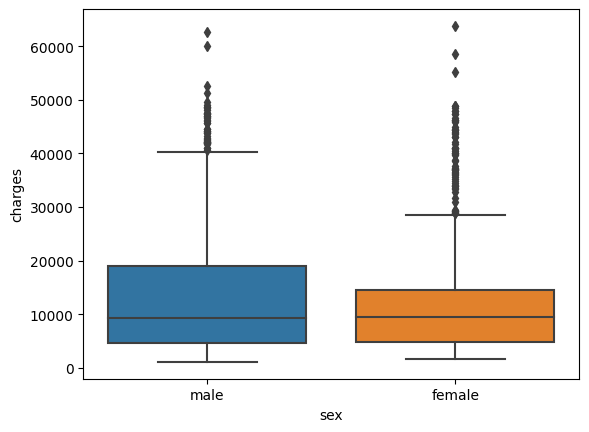

In [4]:
sns.boxplot(x="sex", y="charges", data=dataset_frame,
order=["male", "female"])

>> The boxplot shows that the median (middle value) of charges for females is slightly lower than that for males, but the mean (average) charge is about the same for both sexes. Additionally, the interquartile range (IQR) for females is smaller than that for males, indicating that the charges for females are more tightly clustered around the median than for males. Finally, there are some outliers for both sexes, with males having slightly more extreme values than females. 

- plot double-bar charts from conditional percentages

In [2]:
labels = ['smoking', 'non-smoking']

# Conditional percentage

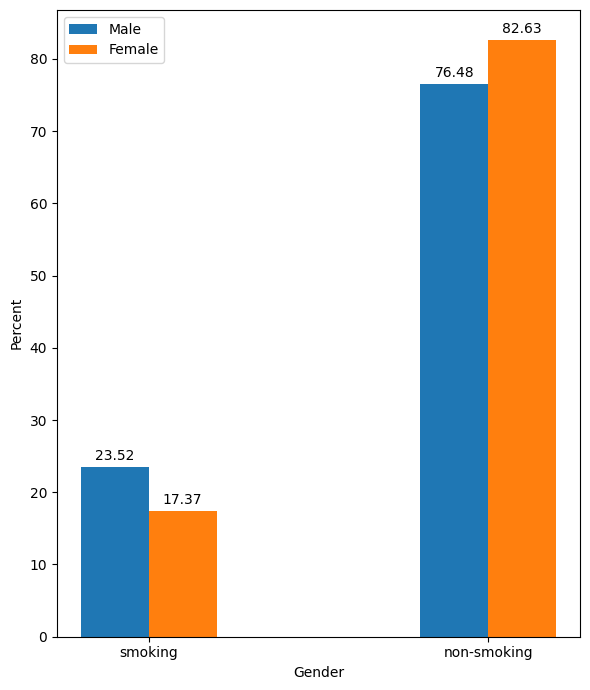

In [7]:
# conditional percentages (%)
male_percentage = [23.52, 76.48]
female_percentage = [17.37, 82.63]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x - width/2, male_percentage, width, label='Male')
rects2 = ax.bar(x + width/2, female_percentage, width,
label='Female')
# Add some text for labels, title and custom x-axis tick labels,etc.
ax.set_ylabel('Percent')
ax.set_xlabel('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()



>>
The percentages indicate that a higher proportion of males smoke compared to females, and a higher proportion of females do not smoke compared to males.
In the context of insurance, the percentage of smokers vs non-smokers can be used by insurance companies to calculate risk and premiums. Smoking is a known risk factor for many health issues, so smokers are often considered higher risk and may be charged higher premiums than non-smokers. Insurance companies may use demographic information, such as gender, in combination with other risk factors to determine premiums for individuals or groups.

# Add some text for labels, title and custom x-axis tick labels, etc.

-  calculate linear correlation between two quantitative variables

In [10]:
corr_mat = np.corrcoef(dataset_frame['age'],
dataset_frame['charges'])
r = corr_mat[0][1]

- scatter plot for two quantitative variables

Text(0.5, 1.0, 'r = 0.299')

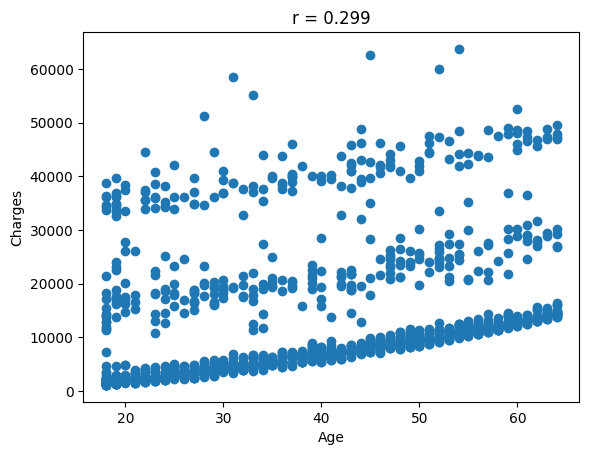

In [11]:
plt.scatter(dataset_frame['age'], dataset_frame['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title(f'r = {round(r,4)}')

>> The output of the scatter plot for the two quantitative variables age and charges shows the data points plotted as a scatter plot. The x-axis represents the age and the y-axis represents the charges. The title of the plot shows the value of the correlation coefficient (r) rounded to four decimal places.

- scatter plot with least square regression line

# least square regression
# eg., evaluate the linear relationship for insurance charges less than $15k

In [13]:
df_small = dataset_frame[dataset_frame.charges <= 15000]

# correlation

In [14]:
r=np.corrcoef(df_small['age'], df_small['charges'])[0][1]

# calculate slope

In [15]:
b=r*(np.std(df_small['charges'])/np.std(df_small['age']))

# calculate intercept

In [16]:
a = np.mean(df_small['charges']) - b*np.mean(df_small['age'])

# regression line

In [17]:
x = np.linspace(10,100)
y = a + b*x

# plot scatter

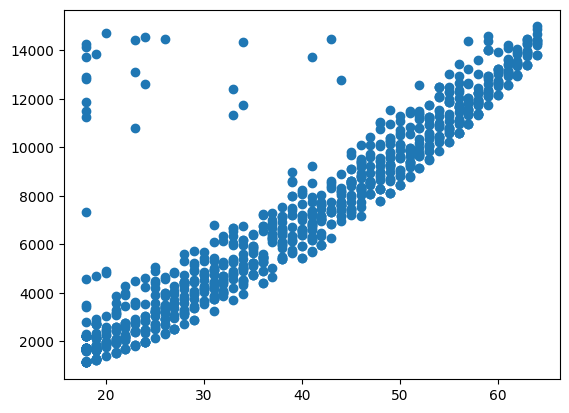

In [18]:
plt.scatter(df_small['age'], df_small['charges'])

>> In the context of insurance, we can say that there is a positive correlation between age and charges, meaning that as age increases, so do the insurance charges. This is supported by the scatter plot with a least square regression line, where we can see a clear upward trend. This could be due to a variety of factors, such as an increased likelihood of health issues or more expensive medical treatments as people age. However, correlation does not imply causation, so further analysis would be needed to determine the underlying reasons for this relationship.

# plot regression line

Text(0.5, 1.0, 'Least Square Regression')

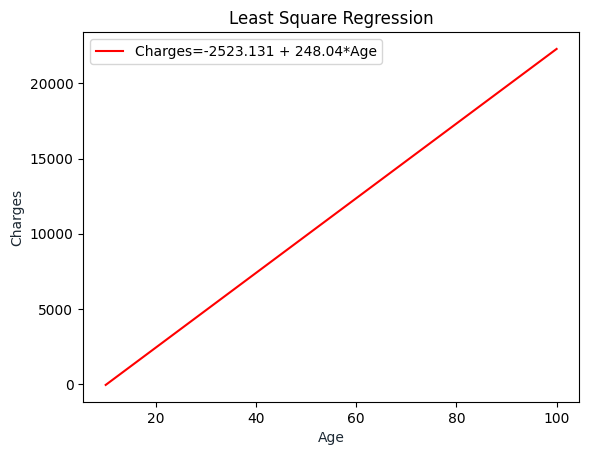

In [19]:
plt.plot(x, y, '-r', label=f'Charges={round(a,3)} + {round(b,3)}*Age')

plt.xlabel('Age', color='#1C2833')
plt.ylabel('Charges', color='#1C2833')
plt.legend(loc='upper left')
plt.title('Least Square Regression')


>> The output of the scatter plot with least square regression line adds a red line that represents the least square regression line. The slope of the line (b) represents the amount of change in charges for each unit increase in age. The y-intercept of the line (a) represents the estimated charges when the age is 0. The equation of the least square regression line is also displayed in the plot's legend. The scatter plot with the least square regression line provides a visual representation of the linear relationship between the two variables, including the direction and strength of the relationship.